In [31]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2
from tensorflow.keras.metrics import BinaryAccuracy
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [32]:
# Directory Path
BASE_DIR = 'Dataset2'
print(f"Base Directory: {os.listdir(BASE_DIR)}")

data_train='Dataset2/train'
print(f"Data Directory: {os.listdir(data_train)}")
data_validation='Dataset2/valid'
print(f"Data Directory: {os.listdir(data_validation)}")

Base Directory: ['LokaJamu-7.txt', 'train', 'valid']
Data Directory: ['Belimbing Sayur', 'Bunga Lawang', 'Jahe', 'Jeruk Nipis', 'Kunyit', 'Lengkuas', 'Mengkudu']
Data Directory: ['Belimbing Sayur', 'Bunga Lawang', 'Jahe', 'Jeruk Nipis', 'Kunyit', 'Lengkuas', 'Mengkudu']


In [33]:
# Define constants
BATCH_SIZE = 32  # Set your batch size
NUM_CLASSES = 7  # Set the number of classes
CLASS_MODE='categorical'

In [34]:
# Data augmentation for training and rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [35]:
# Use binary class mode for multi-label classification
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE # Change to 'binary' for multi-label
)

validation_generator = test_datagen.flow_from_directory(
    data_validation,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE # Change to 'binary' for multi-label
)


Found 2055 images belonging to 7 classes.
Found 487 images belonging to 7 classes.


In [ ]:
#create model
def based_model():
    model=tf.keras.models.Sequential([
        tf.keras.Input(shape=(224,224,3)),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(16,(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(32,(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        
        # 128 bad
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2), 
        tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid')
    ])
    return model


In [42]:
model = based_model()


In [43]:

# Compile the model with binary crossentropy loss
model.compile(loss='binary_crossentropy',  # Change to binary_crossentropy
              optimizer=tf.optimizers.Adam(),
              metrics=[BinaryAccuracy()])


In [44]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,459,239 (9.38 MB)

 Trainable params: 2,458,503 (9.38 MB)

 Non-trainable params: 736 (2.88 KB)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric yang diamati
    patience=5,          # Epoch tanpa perbaikan sebelum pelatihan dihentikan
    restore_best_weights=True  # Kembalikan bobot terbaik setelah pelatihan berhenti
)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric yang diamati
    factor=0.1,          # Faktor pengurangan learning rate (misal, dikali 0.1)
    patience=3,          # Epoch tanpa perbaikan sebelum learning rate dikurangi
    min_lr=1e-6          # Batas minimum learning rate
)


# Callbacks
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_accuracy = logs.get('binary_accuracy')
        val_accuracy = logs.get('val_binary_accuracy')

        if train_accuracy >= 0.95 and val_accuracy >= 0.85:
            self.model.stop_training = True
            print("\nReached 95% train accuracy and 85% validation accuracy, so cancelling training!")


In [46]:
epoch = 1000
history = model.fit(train_generator, 
                    batch_size=BATCH_SIZE, 
                    epochs=epoch, 
                    validation_data=validation_generator, 
                    shuffle=True,
                    callbacks=[EarlyStoppingCallback(), early_stopping, reduce_lr])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/1000
 4/65 ━━━━━━━━━━━━━━━━━━━━ 59s 980ms/step - binary_accuracy: 0.5251 - loss: 5.0479

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 68s 991ms/step - binary_accuracy: 0.6075 - loss: 4.2895 - val_binary_accuracy: 0.6536 - val_loss: 2.3383 - learning_rate: 0.0010
Epoch 2/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - binary_accuracy: 0.7418 - loss: 1.7511 - val_binary_accuracy: 0.8571 - val_loss: 1.1243 - learning_rate: 0.0010
Epoch 3/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 63s 963ms/step - binary_accuracy: 0.8226 - loss: 0.9675 - val_binary_accuracy: 0.8571 - val_loss: 0.7689 - learning_rate: 0.0010
Epoch 4/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 58s 895ms/step - binary_accuracy: 0.8621 - loss: 0.6448 - val_binary_accuracy: 0.8571 - val_loss: 0.6758 - learning_rate: 0.0010
Epoch 5/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 63s 973ms/step - binary_accuracy: 0.8656 - loss: 0.5295 - val_binary_accuracy: 0.8571 - val_loss: 0.6224 - learning_rate: 0.0010
Epoch 6/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 59s 910ms/step - binary_accuracy: 0.8750 - loss: 0.4690 - val_binary_accuracy: 0.8571 - val_loss: 0.6271 - learning_rate: 0.0010
Ep

In [47]:
ds = validation_generator
print("Test Accuracy", model.evaluate(ds)[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - binary_accuracy: 0.8571 - loss: 0.5376
Test Accuracy 0.8571426868438721


In [48]:
print("Loss Accuracy", model.evaluate(ds)[0])

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 691ms/step - binary_accuracy: 0.8571 - loss: 0.5411
Loss Accuracy 0.5404351353645325


In [49]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']

train_acc= history.history['binary_accuracy']
val_acc= history.history['val_binary_accuracy']

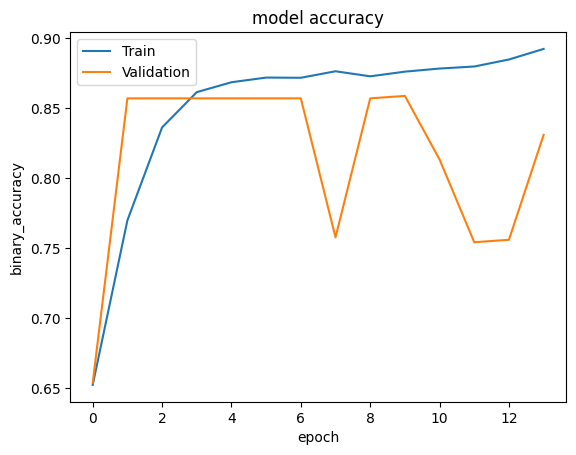

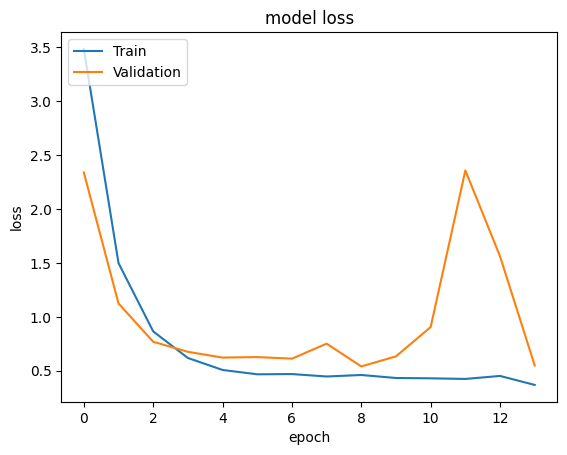

In [50]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title("model accuracy")
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(["Train", 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel('epoch')
plt.legend(["Train", 'Validation'], loc='upper left')
plt.show()